# TEI Conference 2036 #

## Etape 4 : Classification non supervisée ##

### Préambule ###

Nous allons faire ici de la classification non supervisée grâce au package SKLearn, librairie dédiée au Machine Learning.

L'objectif est de soumettre librement le corpus à l'ordinateur et de le laisser créer des clusters, c'est à dire des regroupements de textes. Pour cela, l'ordinateur va vectoriser chaque terme de chaque abstract du corpus, permettant d'attribuer à chaque mot une valeur unique pondérée. Grâce à ces calculs, nous obtenons une représentation des textes dans l'espace, que l'ordinateur peut ensuite réunir en calculant la proximité de chacun des vecteurs / textes depuis certains points (les centroids) disposés aléatoirement. La répétition de cette expérience aléatoire permet de définir une classification supposée objective.

Pour la vectorisation, nous utilisons la méthode TF-IDF de SKLearn. La TF-IDF (Term Frequency-Inverse Document Frequency) est une méthode de calcul de la valeur attribuée à chaque mot qui se différencie d'abord de la fréquence brut (compte du nombre d'occurence) et de la fréquence relative (compte du nombre d'occurence divisé par le nombre de mots du texte) **en divisant la fréquence d'un mot par le nombre de corpus où ce mot est présent**.
Cette méthode a l'avantage de pouvoir résoudre un problème dans la fouille de texte : il a été effectivement remarqué qu'un terme fréquent dans un texte est généralement fréquent également dans les autres documents du corpus. Ainsi, **la TF-IDF permet de relever des termes qui sont fréquents distinctement dans un texte au regard des autres textes du corpus**, et non plus simplement des termes fréquents dans un texte. Nous pouvons alors distinguer un texte des autres, et rassembler des textes ensemble.

La classification que nous obtiendrons nous permettra de comparer avec le plan déterminé par le programme de la conférence TEI 2016, par exemple.

### Les packages ### 


Il faut lancer la cellule ci-dessous pour importer les packages dédiés.

La librairie SKLearn permet, grâce à la TF-IDF, de vectoriser les textes, c'est à dire d'attribuer à chaque mot un vecteur unique le caractérisant dans l'espaces. KMeans permet en outre de définir des clusters.

La librairie spaCy permet de lemmatiser, tandis que la librairie PorterStemmer de NLTK permet de stemmer.

Les librairies Pandas, Numpy et Scipy permettent de traiter la donnée et de produire des tableaux à partir des textes vectorisés.

In [1]:
import os
import csv
import sys

# Vectorisation
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer


#Pour la représentation des clusters dans la partie graphique
import pandas as pd
import numpy as np
import scipy as sp

#Pour une ébauche de topic modeling à partir de NMF
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize

### Choisir son corpus de travail ###

Ensuite, il faut choisir quel set sera loadé et analysé entre les abstracts lemmatisés et les abstracts loadés. Le résultat change entre les deux versions. Pour un premier essai, il est premier de travailler avec la version lemmatisée.

In [2]:
#Pour utiliser les textes stemmés, c'est ici

documents = []
Path = "./cache2016/cacheSTEM/"
filelist = os.listdir(Path) #filelist est une liste regroupant tous les chemins vers les différents abstracts.

for abstract in filelist:
    with open(Path + abstract, "r", encoding="UTF-8") as y:
        texte = y.read()
        documents.append(texte)

In [3]:
#Pour utiliser les textes lemmatisés, c'est ici

documents = []
Path = "./cache2016/cacheLEM/"
filelist = os.listdir(Path) #filelist est une liste regroupant tous les chemins vers les différents abstracts.

for abstract in filelist:
    with open(Path + abstract, "r", encoding="UTF-8") as y:
        texte = y.read()
        documents.append(texte)





## Définir les clusters ##

Après avoir tokennisé et lemmatisé/stemmé nos abstracts, nous allons maintenant les vectoriser (représenter chaque mot sous la forme d'un vecteur sur un plan ordonné en deux dimensions) puis ensuite nous allons laisser la machine définir des clusters, c'est à dire des groupes de mots qui ont un sens commun.

Ici, on associe à chaque mot de tous les abstracts une coordonnée unique à chaque mot utilisé, pour ensuite pouvoir les placer sur un plan en 2D et ainsi relever des ressemblances.

In [4]:
#vectorise le texte, c'est à dire transforme chaque terme du texte en vecteur
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

Ensuite, on réunit les termes vectorisés en cluster, c'est à dire en groupe de ressemblance.

In [5]:
#clusterise les documents, ici 8 clusters
true_k = 8
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=8, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Enfin, on montre les termes que l'ordinateur a pu rassembler ensemble.

In [6]:
#montre le top 10 des mot-clés les plus représentatifs de chaque cluster
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
        

        


Top terms per cluster:
Cluster 0:
 pron
 tei
 text
 metadata
 literary
 use
 work
 sense
 repository
 manuscript
Cluster 1:
 pron
 tei
 tool
 mozart
 text
 acdh
 use
 xml
 license
 project
Cluster 2:
 pron
 existdb
 application
 tei
 wikipedias
 database
 crowd
 project
 xml
 source
Cluster 3:
 code
 pron
 pm
 single
 chicken
 tei
 requirement
 scholarship
 interpretation
 thing
Cluster 4:
 dialect
 database
 tei
 pron
 datum
 entry
 dictionary
 bread
 lexical
 uk
Cluster 5:
 annotation
 iso
 tei
 pron
 standoff
 github
 serialization
 component
 metadata
 new
Cluster 6:
 edition
 digital
 textgrid
 blog
 support
 library
 catalogue
 readux
 web
 tei
Cluster 7:
 text
 pron
 tag
 encode
 image
 step
 transcriptor
 complex
 method
 tei


## Cluster de documents ##

Grâce à un système de prédiction découlant de l'apprentissage et de l'entraînement sur les termes des abstracts, nous pouvons classifier les abstracts en 8 catégories. Nous pourrons ensuite les comparer avec le classement déjà fait par les organisateurs de la conférence TEI 2019.

In [7]:
Path = "./cache2016/cacheLEM/" #On peut remplacer le cache STEM par LEM à la place, pour ainsi comparer les deux sorties.
filelist = os.listdir(Path) #filelist est une liste regroupant tous les chemins vers les différents abstracts.
liste_triee = [] #c'est la liste contenant les infos triées de tous les abstracts


for abstract in filelist:
    reference = abstract.replace('.txt', '') #je normalise le nom du texte pour le faire correpondre avec celui indiqué dans le tableau csv réunissant toutes les informations
    with open(Path + abstract, "r", encoding="UTF-8") as y:
        liste_resultat_unitaire = [] #j'instancie la liste des infos propres à chaque abstract
        texte = y.read()
        X = vectorizer.transform([texte]) #je vectorise le texte de l'abstract
        predicted = model.predict(X)  #j'attribue l'abstract à un cluster. predicted est de la classe numpy array : c'est un vecteur
        with open('./cache2016/TEI2016.csv', 'r') as csvfile:
            read = csv.reader(csvfile, delimiter = ',')
            titre = ''
            auteurs = ''
            for row in read:
                if row[4] == reference:
                    titre = row[1]
                    auteurs = row[0]
        liste_resultat_unitaire.append(titre)
        liste_resultat_unitaire.append(auteurs)
        liste_resultat_unitaire.append(int(predicted))
        liste_triee.append(liste_resultat_unitaire)
        
list_grp1 = []
list_grp2 = []
list_grp3 = []
list_grp4 = []
list_grp5 = []
list_grp6 = []
list_grp7 = []
list_grp8 = []

print("Dans le groupe 1, il y a :")
for elem in liste_triee:
    if elem[2] == 0:
        list_grp1.append(elem[0]) 
        print("\t", elem[0] )
        
print("\n Dans le groupe 2, il y a :")
for elem in liste_triee:
    if elem[2] == 1:
        list_grp2.append(elem[0])
        print("\t", elem[0] )
        
print("\n Dans le groupe 3, il y a :")
for elem in liste_triee:
    if elem[2] == 2:
        list_grp3.append(elem[0])
        print("\t", elem[0] )

print("\n Dans le groupe 4, il y a :")
for elem in liste_triee:
    if elem[2] == 3:
        list_grp4.append(elem[0])
        print("\t", elem[0] )

print("\n Dans le groupe 5, il y a :")
for elem in liste_triee:
    if elem[2] == 4:
        list_grp5.append(elem[0])
        print("\t", elem[0] )
        
print("\n Dans le groupe 6, il y a :")
for elem in liste_triee:
    if elem[2] == 5:
        list_grp6.append(elem[0])
        print("\t", elem[0] )
        
print("\n Dans le groupe 7, il y a :")
for elem in liste_triee:
    if elem[2] == 6:
        list_grp7.append(elem[0])
        print("\t", elem[0] )
        
print("\n Dans le groupe 8, il y a :")
for elem in liste_triee:
    if elem[2] == 7:
        list_grp8.append(elem[0])
        print("\t", elem[0] )


Dans le groupe 1, il y a :
	 CETEIcean, a JavaScript library for isomorphic TEI to HTML transformation
	 Automating the validation of TEI metadata processing
	 Towards a Repository of Senses for Use in TEI encoded Dictionaries
	 The Authoritative Bibliography for the Chymistry of Isaac Newton
	 Islamic Manuscripts in Cambridge Digital Library & the German-French virtual library project Paleocoran
	 Móricz Digital Edition — Possibilities and connections of a correspondence material
	 Writing under the Magnifying Glass. Encoding the Text in Progress
	 Andreas Okopenko: diaries from the poet’s estate (hybrid edition)
	 Encoding crime and punishment: A digital collection of historic broadsheets
	 Bibliography in the Inscriptions of Israel / Palestine Epigraphic Project
	 Purifying and Simplifying: Advanced TEI Customization
	 Encoding Text about Things
	 TEI markup for the 90-volume edition of Leo Tolstoy’s complete works
	 Does this shoe fit? Applying the TEI guidelines to Sanskrit philos

Voici le plan et l'agencement des conférences tel qu'il est indiqué ici : http://tei2016.acdh.oeaw.ac.at/sites/default/files/TEI%20Session%20Overview%202016_A0.pdf

Tools :
- TEIScribe: A graphic tool for composing and testing TEI documents in the context of the EVI-LINHD environment
- Building a collaborative editorial workbench for legal texts with complex structures
- Automating the validation of TEI metadata processing
- Common Creativity international. CC-licensing and other options for TEI-based digital editions in an international context
- T³ – Typesetting TEI Using TeX. A Plea for High-quality Typesetting in the Humanities
- TEI Processing Model Toolbox

Techniques :
- Applying Standard Formats and Tools
- Capturing the crowd-sourcing process: storing different stages of crowd-sourced transcriptions in TEI
- Wiki2TEI: Wikipedias as sources for language research
- Islamic Manuscripts in Cambridge Digital Library & the German-French virtual library project Paleocoran
- msDesc at Oxford and Cambridge
- Creating a maintainable cataloging workflow and infrastructure using TEI
    
Tools demonstration session :
- CETEIcean, a JavaScript library for isomorphic TEI to HTML transformation
- The Elwood Markup & Text Analyzer (TEMTA)
- Early Print: annotation module for TEI
- STEP Transcriptor: a comprehensive TEI-XML compliant transcription app

Methods :
- TEI and lemon: a comparative study on the lexical encoding and interoperability
- Exploring data models for heterogenous dialect data: the case of explore.bread.AT!
- Encoding a Dictionary of Russian Dialects in TEI and linking to LOD Resources
- Writing under the Magnifying Glass. Encoding the Text in Progress
- Tomayto, tomahto? Encoding variant taxonomies in TEI
- Documenting Transmission: The Analysis of the Folk Process using Versioning Machine 5.0

Means :
- Wake up, standOff!
- TEI document and schema visualization and modeling using mindmaps
- Purifying and Simplifying: Advanced TEI Customization
- Encoding Text as a Nexus of Perspective Hierarchies: Case Studies in XML, LMNL, and RDF
- We are TEI. You will be assimilated!
- Encoding Text about Things

Poster presentation session :
- Andreas Okopenko: diaries from the poet’s estate (hybrid edition)
- Bibliography in the Inscriptions of Israel / Palestine Epigraphic Project
- Bringing TEI PM to Foggy Bottom
- Creating Digital Critical Editions with Readux
- Database of Belarusian Periodicals
- From DOCX via TEI to Literature Map
- Hyperdonat, digital edition project
- Modeling a Body of Literature in TEI: Bibliotheca Hagiographica Syriaca Electronica
- Support for TEI editions in academic libraries. An upcoming study of the Library Publishing Coalition
- Tagging on Buddhist Images via IIIF and TEI encoding
- TEI in the Archives: Unfolding the Bookshops in Paul’s Cross Churchyard
- The Digital Editions Catalogue App: A web application to browse, curate and analyze digital editions
- Towards a Repository of Senses for Use in TEI encoded Dictionaries
- Wienerisches Diarium Digital: Unlocking a historic newspaper for interdisciplinary studies with the TEI Guidelines
- STEP Transcriptor and STEP Text Comparator
- EuRED: XML-TEI in database structure
- HowTo create your own digital edition web app — A blog

Editions :
- TEI markup for the 90-volume edition of Leo Tolstoy’s complete works
- Shakespeare's N-grams at 400: Comparing Content Themes With Four Contemporaries
- The Authoritative Bibliography for the Chymistry of Isaac Newton
- Encoding crime and punishment: A digital collection of historic broadsheets
- The BVH in Tours and the "Bibliothèque françoise" project
- Early Modern Slovenian Manuscripts Between Description, Critical Edition and Lexicon

Editing :
- Converting and Representing Social Media Corpora into TEI: Schema and best practices from CLARIN-D
- Móricz Digital Edition — Possibilities and connections of a correspondence material
- Biography as compilation: How to edit Georg Nikolaus Nissen’s
- Upconversion and Migration: Generating a TEI-EpiDoc Corpus of Sicilian Inscriptions
- Cantus Network — a semantically enriched digital edition of libri ordinarii of the Salzburg metropolitan province
- Does this shoe fit? Applying the TEI guidelines to Sanskrit philosophical texts

J'encode la répartition des titres dans les groupes dans des listes :

In [15]:
V_grp1 = ['TEIScribe: A graphic tool for composing and testing TEI documents in the context of the EVI-LINHD environment',
'Building a collaborative editorial workbench for legal texts with complex structures',
'Automating the validation of TEI metadata processing',
'Common Creativity international. CC-licensing and other options for TEI-based digital editions in an international context',
'T³ – Typesetting TEI Using TeX. A Plea for High-quality Typesetting in the Humanities',
'TEI Processing Model Toolbox']
V_grp2 = ['Applying Standard Formats and Tools',
'Capturing the crowd-sourcing process: storing different stages of crowd-sourced transcriptions in TEI',
'Wiki2TEI: Wikipedias as sources for language research',
'Islamic Manuscripts in Cambridge Digital Library & the German-French virtual library project Paleocoran',
'msDesc at Oxford and Cambridge',
'Creating a maintainable cataloging workflow and infrastructure using TEI']
V_grp3 = ['CETEIcean, a JavaScript library for isomorphic TEI to HTML transformation',
'The Elwood Markup & Text Analyzer (TEMTA)',
'Early Print: annotation module for TEI',
'STEP Transcriptor: a comprehensive TEI-XML compliant transcription app']
V_grp4 = ['TEI and lemon: a comparative study on the lexical encoding and interoperability',
'Exploring data models for heterogenous dialect data: the case of explore.bread.AT!',
'Encoding a Dictionary of Russian Dialects in TEI and linking to LOD Resources',
'Writing under the Magnifying Glass. Encoding the Text in Progress',
'Tomayto, tomahto? Encoding variant taxonomies in TEI',
'Documenting Transmission: The Analysis of the Folk Process using Versioning Machine 5.0']
V_grp5 = ['Wake up, standOff!',
'TEI document and schema visualization and modeling using mindmaps',
'Purifying and Simplifying: Advanced TEI Customization',
'Encoding Text as a Nexus of Perspective Hierarchies: Case Studies in XML, LMNL, and RDF',
'We are TEI. You will be assimilated!',
'Encoding Text about Things']
V_grp6 = ['Andreas Okopenko: diaries from the poet’s estate (hybrid edition)',
'Bibliography in the Inscriptions of Israel / Palestine Epigraphic Project',
'Bringing TEI PM to Foggy Bottom',
'Creating Digital Critical Editions with Readux',
'Database of Belarusian Periodicals',
'From DOCX via TEI to Literature Map',
'Hyperdonat, digital edition project',
'Modeling a Body of Literature in TEI: Bibliotheca Hagiographica Syriaca Electronica',
'Support for TEI editions in academic libraries. An upcoming study of the Library Publishing Coalition',
'Tagging on Buddhist Images via IIIF and TEI encoding',
'TEI in the Archives: Unfolding the Bookshops in Paul’s Cross Churchyard',
'The Digital Editions Catalogue App: A web application to browse, curate and analyze digital editions',
'Towards a Repository of Senses for Use in TEI encoded Dictionaries',
'Wienerisches Diarium Digital: Unlocking a historic newspaper for interdisciplinary studies with the TEI Guidelines',
'STEP Transcriptor and STEP Text Comparator',
'EuRED: XML-TEI in database structure',
'HowTo create your own digital edition web app — A blog']
V_grp7 = ['TEI markup for the 90-volume edition of Leo Tolstoy’s complete works',
"Shakespeare's N-grams at 400: Comparing Content Themes With Four Contemporaries",
'The Authoritative Bibliography for the Chymistry of Isaac Newton',
'Encoding crime and punishment: A digital collection of historic broadsheets',
'The BVH in Tours and the "Bibliothèque françoise" project',
'Early Modern Slovenian Manuscripts Between Description, Critical Edition and Lexicon']
V_grp8 = ['Converting and Representing Social Media Corpora into TEI: Schema and best practices from CLARIN-D',
'Móricz Digital Edition — Possibilities and connections of a correspondence material',
"Biography as compilation: How to edit Georg Nikolaus Nissen’s",
'Upconversion and Migration: Generating a TEI-EpiDoc Corpus of Sicilian Inscriptions',
"Cantus Network — a semantically enriched digital edition of libri ordinarii of the Salzburg metropolitan province",
"Does this shoe fit? Applying the TEI guidelines to Sanskrit philosophical texts"]

## Modélisation et comparaison ##

En utilisant la librairie MatPlotLib, nous pouvons faire des graphiques permettant de mieux comprendre ce que nous avons créé. Nous comparerons les résultats obtenus avec les " clusters " créés par les organisateurs.

### Un tableau ###

Tout d'abord, nous allons représenter la liste des attributions sous forme d'un tableau pour comparer les clusters de l'ordinateur et les groupes faits par les organisateurs.

In [16]:
import plotly.graph_objects as go

headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Groupe 1</b>','<b>Groupe 2</b>','<b>Groupe 3</b>','<b>Groupe 4</b>','<b>Groupe 5</b>','<b>Groupe 6</b>','<b>Groupe 7</b>','<b>Groupe 8</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      list_grp1,
      list_grp2,
      list_grp3,
      list_grp4,
      list_grp5,
      list_grp6,
      list_grp7,
      list_grp8],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
    align = ['center'],
    font = dict(color = 'darkslategray', size = 9)
    ))
])

fig.show()

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Groupe 1</b>','<b>Groupe 2</b>','<b>Groupe 3</b>','<b>Groupe 4</b>','<b>Groupe 5</b>','<b>Groupe 6</b>','<b>Groupe 7</b>','<b>Groupe 8</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      V_grp1,
      V_grp2,
      V_grp3,
      V_grp4,
      V_grp5,
      V_grp6,
      V_grp7,
      V_grp8],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
    align = ['center'],
    font = dict(color = 'darkslategray', size = 9)
    ))
])

fig.show()

### Distribution à l'intérieur des clusters  ###

Nous représentons la distribution des conférences dans un camembert.

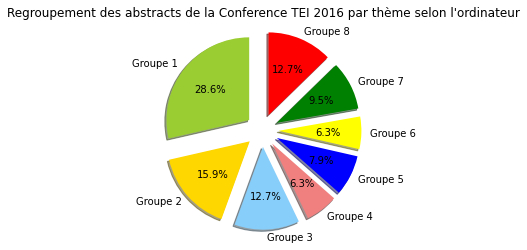

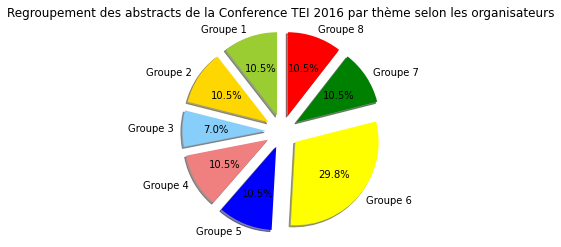

In [17]:
import matplotlib.pyplot as plt

labels = 'Groupe 1', 'Groupe 2', 'Groupe 3', 'Groupe 4', 'Groupe 5', 'Groupe 6', 'Groupe 7', 'Groupe 8'
sizes = [len(list_grp1), len(list_grp2), len(list_grp3), len(list_grp4), len(list_grp5), len(list_grp6), len(list_grp7), len(list_grp8)]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'blue', 'yellow', 'green', 'red']
explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Regroupement des abstracts de la Conference TEI 2016 par thème selon l'ordinateur")
plt.show()

labels = 'Groupe 1', 'Groupe 2', 'Groupe 3', 'Groupe 4', 'Groupe 5', 'Groupe 6', 'Groupe 7', 'Groupe 8'
sizes = [len(V_grp1), len(V_grp2), len(V_grp3), len(V_grp4), len(V_grp5), len(V_grp6), len(V_grp7), len(V_grp8)]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'blue', 'yellow', 'green', 'red']
explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Regroupement des abstracts de la Conference TEI 2016 par thème selon les organisateurs")
plt.show()

Les résultats obtenus, notamment via le camembert, sont très intéressants : globalement, la taille des clusters est identique de manière relative entre les groupes faits par la machine et ceux faits par les ordinateurs.

Cependant, quand nous regardons les deux tableaux, nous voyons que sauf exception, ce ne sont pas les mêmes textes qui sont mis ensemble.

### Comprendre ses clusters avec NMF ###

Grâce à la librairie NMF (Factorisation Matricielle Non-négative), je peux essayer de comprendre les clusters produits pour la machine en lui demandant de sortir les mots les plus représentatifs de chaque cluster. 

Nous allons donc pouvoir utiliser la librairie NMF qui se base sur la vectorisation de SKLearn pour reconstruire les clusters, mais cette fois-ci en sortant les mot-clés les plus utilisés.

In [11]:
transformer = TfidfTransformer(smooth_idf=True)
x_tfidf = transformer.fit_transform(X) #j'insère X, c'est à dire les documents vectorisés
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1) #normalisation des vecteurs pour rentrer dans la matrice

In [12]:
num_topics = 8
model = NMF(n_components=num_topics) #Je construis l'algorithme de NMF
model.fit(xtfidf_norm) #J'entre mes vecteurs normalisés dans l'algorithme de NMF

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=8, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [13]:
def get_nmf_topics(model, n_top_words):
    
    # Je récupère ici un dictionnaire avec le mot en clé et son vecteur en valeur. Permet de récupérer les mots.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {}
    for i in range(num_topics):
        
        #Pour chaque cluster j'obtiens les plus gros vecteurs, et j'ajoute les mots dans le dictionnaires initialisés "word_dict".
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Cluster n° ' + '{:02d}'.format(i+1)] = words
    
    return pd.DataFrame(word_dict);

In [14]:
get_nmf_topics(model, 10)

,Cluster n° 01,Cluster n° 02,Cluster n° 03,Cluster n° 04,Cluster n° 05,Cluster n° 06,Cluster n° 07,Cluster n° 08
0,syriaca,digital,express,specific,responsibility,bibliotheca,decision,create
1,literature,suggestion,vii,different,number,description,map,metadata
2,tei,genuine,particularly,content,content,tabular,life,archive
3,relationship,description,bibliotheca,publish,bhse,metadata,dataset,record
4,metadata,editorial,pseudonymous,bhse,edition,legacy,express,format
5,model,work,map,metadata,corpus,decision,frequently,relationship
6,work,authorial,corpus,textbearing,recension,poster,encode,apply
7,org,core,syriac,person,pron,author,language,attribute
8,body,previous,particular,core,sense,electronica,edition,frbrhttp
9,syriac,expand,genuine,revise,expand,marc,classification,editorial


Les clusters ainsi formés ont, comme on aurait pu l'imaginer, aucun sens pour un être humain malheureusement.